# Danial Azimi - 3rd Assignment second notebook

In [3]:
# Import TensorFlow
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [4]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split

# Define the path to the directory containing the images
train_dir = "/kaggle/input/architectural-heritage-elements-image64-dataset/train"
test_dir = "/kaggle/input/architectural-heritage-elements-image64-dataset/test"

# Define the list of classes
classes = ['apse', 'column', 'flying_buttress', 'gargoyle', 'altar', 
           'bell_tower', 'vault', 'stained_glass', 'dome(inner)', 'dome(outer)']

# Load images and labels
train_images = []
train_labels = []
test_images = []
test_labels = []

for label, class_name in enumerate(classes):
    train_class_dir = os.path.join(train_dir, class_name)
    test_class_dir = os.path.join(test_dir, class_name)
    
    for img_name in os.listdir(train_class_dir):
        img_path = os.path.join(train_class_dir, img_name)
        img = load_img(img_path, target_size=(100, 100))
        img_array = img_to_array(img) / 255.0
        train_images.append(img_array)
        train_labels.append(label)
        
    for img_name in os.listdir(test_class_dir):
        img_path = os.path.join(test_class_dir, img_name)
        img = load_img(img_path, target_size=(100, 100))
        img_array = img_to_array(img) / 255.0
        test_images.append(img_array)
        test_labels.append(label)

# Convert lists to numpy arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels)
test_images = np.array(test_images)
test_labels = np.array(test_labels)


In [5]:
train_images.shape

(10130, 100, 100, 3)

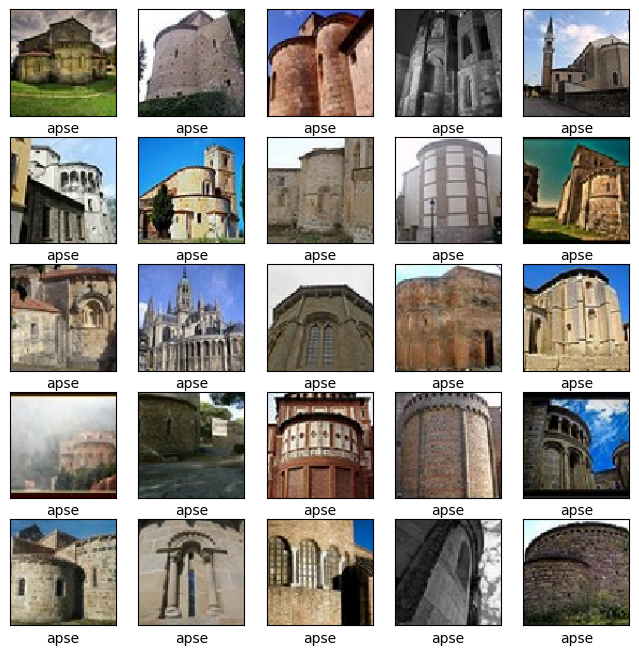

In [6]:
class_names = classes

plt.figure(figsize=(8,8))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    #which is why we need the extra index
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Modeling with ResNet Architecture

In [12]:
# Define the ResNet model
def resnet_model(input_shape, num_classes):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(32, (3, 3), activation='relu')(inputs)
    x = layers.Conv2D(64, (3, 3), activation='relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    
    # Residual block 1
    residual1 = layers.Conv2D(128, (1, 1), strides=(2, 2), padding='same')(x)
    residual1 = layers.BatchNormalization()(residual1)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
   
    x = layers.Conv2D(128, (1, 1), strides=(2, 2), padding='same')(x)
    x = layers.add([x, residual1])
    x = layers.Activation('relu')(x)
    
    x = layers.Conv2D(128, (3, 3), activation='relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    
    # Residual block 2
    residual2 = layers.Conv2D(256, (1, 1), strides=(2, 2), padding='same')(x)
    residual2 = layers.BatchNormalization()(residual2)
    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)

    x = layers.Conv2D(256, (1, 1), strides=(2, 2), padding='same')(x)
    x = layers.add([x, residual2])
    x = layers.Activation('relu')(x)
    
        # Residual block 2
    residual3 = layers.Conv2D(512, (1, 1), strides=(2, 2), padding='same')(x)
    residual3 = layers.BatchNormalization()(residual3)
    x = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)

    x = layers.Conv2D(512, (1, 1), strides=(2, 2), padding='same')(x)
    x = layers.add([x, residual3])
    x = layers.Activation('relu')(x)
    
    x = layers.Flatten()(x)
    x = layers.Dropout(0.2)(x)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dense(32, activation='relu')(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    
    model = models.Model(inputs, outputs)
    return model

# Create the ResNet-like model
model = resnet_model(input_shape=(100, 100, 3), num_classes=10)
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 100, 100,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_32 (Conv2D)  │ (None, 98, 98,    │        896 │ input_layer_4[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_33 (Conv2D)  │ (None, 96, 96,    │     18,496 │ conv2d_32[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_6     │ (None, 48, 48,    │          0 │ conv2d_33[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_35 (Conv2D)  │ (None, 48, 48,    │     73,856 │ max_pooling2d_6[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 48, 48,    │        512 │ conv2d_35[0][0]   │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_36 (Conv2D)  │ (None, 48, 48,    │    147,584 │ batch_normalizat… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 48, 48,    │        512 │ conv2d_36[0][0]   │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_34 (Conv2D)  │ (None, 24, 24,    │      8,320 │ max_pooling2d_6[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_37 (Conv2D)  │ (None, 24, 24,    │     16,512 │ batch_normalizat… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 24, 24,    │        512 │ conv2d_34[0][0]   │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_6 (Add)         │ (None, 24, 24,    │          0 │ conv2d_37[0][0],  │
│                     │ 128)              │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 24, 24,    │          0 │ add_6[0][0]       │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_38 (Conv2D)  │ (None, 22, 22,    │    147,584 │ activation_4[0][… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_7     │ (None, 11, 11,    │          0 │ conv2d_38[0][0]   │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_40 (Conv2D)  │ (None, 11, 11,    │    295,168 │ max_pooling2d_7[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 11, 11,    │      1,024 │ conv2d_40[0][0] 

 Total params: 5,639,658 (21.51 MB)

 Trainable params: 5,634,282 (21.49 MB)

 Non-trainable params: 5,376 (21.00 KB)

In [13]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=100, 
                    validation_data=(test_images, test_labels))

Epoch 1/100


2024-05-01 09:59:13.911727: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 6.41878, expected 5.4605
2024-05-01 09:59:13.911788: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 8.55856, expected 7.60028
2024-05-01 09:59:13.911803: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 7.93746, expected 6.97918
2024-05-01 09:59:13.911823: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 11: 8.00408, expected 7.04579
2024-05-01 09:59:13.911835: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 23: 8.28716, expected 7.32888
2024-05-01 09:59:13.911846: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 27: 7.77629, expected 6.81801
2024-05-01 09:59:13.911857: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 29: 8.11038, expected 7.1521
2024-05-01 09:59:13.911869: E external/local_xla/xla/

  5/317 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.1792 - loss: 2.3906 

I0000 00:00:1714557566.021420     142 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


315/317 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4052 - loss: 1.7154

2024-05-01 09:59:37.232784: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 6.25869, expected 5.40069
2024-05-01 09:59:37.232844: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 7.25075, expected 6.39275
2024-05-01 09:59:37.232854: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8: 6.77675, expected 5.91875
2024-05-01 09:59:37.232862: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 9: 6.32574, expected 5.46775
2024-05-01 09:59:37.232870: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 10: 6.85992, expected 6.00192
2024-05-01 09:59:37.232878: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 11: 6.97023, expected 6.11223
2024-05-01 09:59:37.232886: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 22: 7.39158, expected 6.53358
2024-05-01 09:59:37.232893: E external/local_xla/xla

317/317 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.4058 - loss: 1.7139

2024-05-01 09:59:48.930355: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1417: 4.81559, expected 4.22952
2024-05-01 09:59:48.930465: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8598: 4.02865, expected 3.44258
2024-05-01 09:59:48.930929: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 76832: 4.73573, expected 3.77877
2024-05-01 09:59:48.930956: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 76833: 6.6227, expected 5.66575
2024-05-01 09:59:48.930992: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 76834: 6.26566, expected 5.3087
2024-05-01 09:59:48.931005: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 76835: 6.80268, expected 5.84573
2024-05-01 09:59:48.931019: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 76836: 6.79706, expected 5.8401
2024-05-01 09:59:48.931032: E ex

317/317 ━━━━━━━━━━━━━━━━━━━━ 48s 82ms/step - accuracy: 0.4061 - loss: 1.7132 - val_accuracy: 0.0969 - val_loss: 4.8353
Epoch 2/100
317/317 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.6338 - loss: 1.0891 - val_accuracy: 0.5833 - val_loss: 1.1760
Epoch 3/100
317/317 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.7047 - loss: 0.8737 - val_accuracy: 0.5328 - val_loss: 1.7293
Epoch 4/100
317/317 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.7679 - loss: 0.6918 - val_accuracy: 0.6802 - val_loss: 0.9940
Epoch 5/100
317/317 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.8042 - loss: 0.5794 - val_accuracy: 0.6282 - val_loss: 1.3458
Epoch 6/100
317/317 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.8461 - loss: 0.4625 - val_accuracy: 0.6346 - val_loss: 1.1810
Epoch 7/100
317/317 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.8724 - loss: 0.3778 - val_accuracy: 0.6496 - val_loss: 1.3166
Epoch 8/100
317/317 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.8959 - loss: 0.2991 - val_

44/44 - 0s - 9ms/step - accuracy: 0.7792 - loss: 1.5334


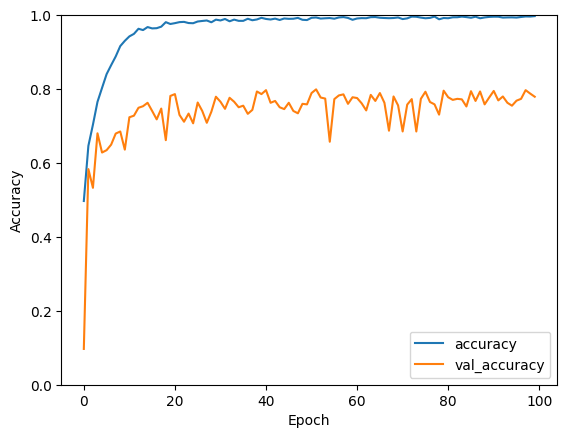

In [14]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,
                                     test_labels,
                                     verbose=2)

In [23]:
# Define the ResNet model
def resnet_model(input_shape, num_classes):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(32, (3, 3), activation='relu')(inputs)
    x = layers.Conv2D(64, (3, 3), activation='relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    
    # Residual block 1
    residual1 = layers.Conv2D(64, (1, 1), strides=(2, 2), padding='same')(x)
    residual1 = layers.BatchNormalization()(residual1)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
   
    x = layers.Conv2D(64, (1, 1), strides=(2, 2), padding='same')(x)
    x = layers.add([x, residual1])
    x = layers.Activation('relu')(x)
    
    x = layers.Conv2D(64, (3, 3), activation='relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    
    # Residual block 2
    residual2 = layers.Conv2D(128, (1, 1), strides=(2, 2), padding='same')(x)
    residual2 = layers.BatchNormalization()(residual2)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)

    x = layers.Conv2D(128, (1, 1), strides=(2, 2), padding='same')(x)
    x = layers.add([x, residual2])
    x = layers.Activation('relu')(x)
    
        # Residual block 2
    residual3 = layers.Conv2D(256, (1, 1), strides=(2, 2), padding='same')(x)
    residual3 = layers.BatchNormalization()(residual3)
    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)

    x = layers.Conv2D(256, (1, 1), strides=(2, 2), padding='same')(x)
    x = layers.add([x, residual3])
    x = layers.Activation('relu')(x)
    
    x = layers.Flatten()(x)
    x = layers.Dropout(0.6)(x)
    x = layers.Dense(64, activation='relu')(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    
    model = models.Model(inputs, outputs)
    return model

# Create the ResNet-like model
model = resnet_model(input_shape=(100, 100, 3), num_classes=10)
model.summary()

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_9       │ (None, 100, 100,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_103 (Conv2D) │ (None, 98, 98,    │        896 │ input_layer_9[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_104 (Conv2D) │ (None, 96, 96,    │     18,496 │ conv2d_103[0][0]  │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_16    │ (None, 48, 48,    │          0 │ conv2d_104[0][0]  │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_106 (Conv2D) │ (None, 48, 48,    │     36,928 │ max_pooling2d_16… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 48, 48,    │        256 │ conv2d_106[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_107 (Conv2D) │ (None, 48, 48,    │     36,928 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 48, 48,    │        256 │ conv2d_107[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_105 (Conv2D) │ (None, 24, 24,    │      4,160 │ max_pooling2d_16… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_108 (Conv2D) │ (None, 24, 24,    │      4,160 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 24, 24,    │        256 │ conv2d_105[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_20 (Add)        │ (None, 24, 24,    │          0 │ conv2d_108[0][0], │
│                     │ 64)               │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_17       │ (None, 24, 24,    │          0 │ add_20[0][0]      │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_109 (Conv2D) │ (None, 22, 22,    │     36,928 │ activation_17[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_17    │ (None, 11, 11,    │          0 │ conv2d_109[0][0]  │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_111 (Conv2D) │ (None, 11, 11,    │     73,856 │ max_pooling2d_17… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 11, 11,    │        512 │ conv2d_111[0][0]

 Total params: 1,522,378 (5.81 MB)

 Trainable params: 1,519,690 (5.80 MB)

 Non-trainable params: 2,688 (10.50 KB)

In [24]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=80, 
                    validation_data=(test_images, test_labels))

Epoch 1/80
317/317 ━━━━━━━━━━━━━━━━━━━━ 28s 46ms/step - accuracy: 0.3605 - loss: 1.8814 - val_accuracy: 0.4309 - val_loss: 1.5965
Epoch 2/80
317/317 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.5803 - loss: 1.2136 - val_accuracy: 0.5905 - val_loss: 1.1851
Epoch 3/80
317/317 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.6566 - loss: 1.0070 - val_accuracy: 0.5755 - val_loss: 1.2759
Epoch 4/80
317/317 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.7162 - loss: 0.8297 - val_accuracy: 0.5399 - val_loss: 1.3450
Epoch 5/80
317/317 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.7575 - loss: 0.7087 - val_accuracy: 0.6239 - val_loss: 1.2798
Epoch 6/80
317/317 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.7770 - loss: 0.6448 - val_accuracy: 0.6439 - val_loss: 1.2835
Epoch 7/80
317/317 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.8090 - loss: 0.5444 - val_accuracy: 0.5655 - val_loss: 1.5537
Epoch 8/80
317/317 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.8407 - loss: 0.4614 - val_acc

44/44 - 0s - 7ms/step - accuracy: 0.7607 - loss: 1.5182


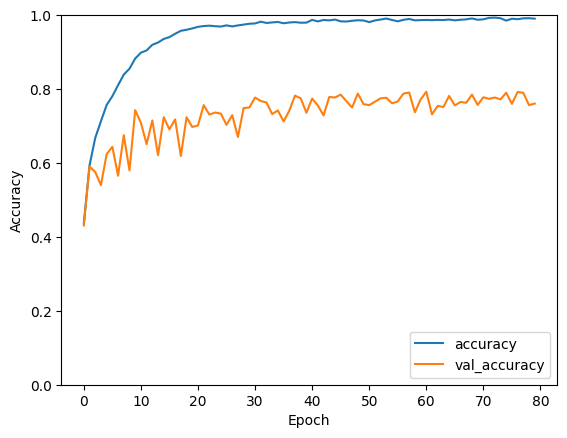

In [25]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,
                                     test_labels,
                                     verbose=2)

## Save the trained model

In [26]:
from tensorflow.keras.models import save_model
import pickle

# Save the model to the output directory
model.save('/kaggle/working/resnet_model.h5')

# Save the training history to the output directory
with open('/kaggle/working/training_history_resnet.pkl', 'wb') as file:
    pickle.dump(history.history, file)

# Check if the files are saved
print("Model and training history saved to the output directory:", os.listdir('/kaggle/working'))    

Model and training history saved to the output directory: ['.virtual_documents', 'training_history_resnet.pkl', 'resnet_model.h5']


# Evaluation

In [33]:
test_predictions = model.predict(test_images)
test_predictions = np.argmax(test_predictions, axis=1)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


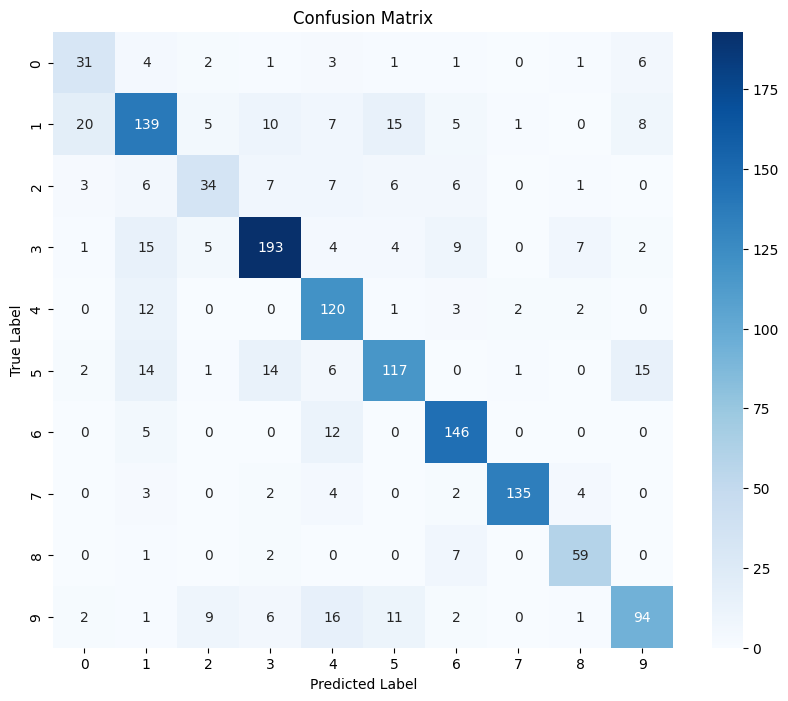

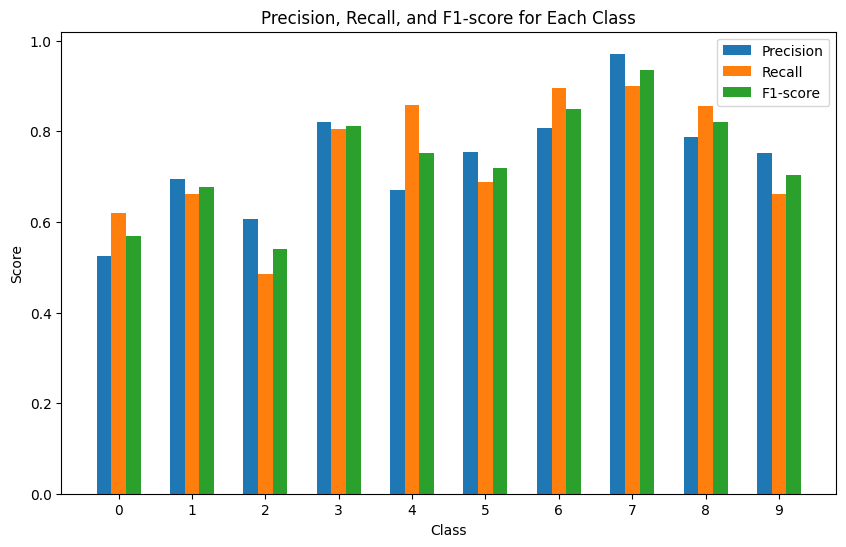

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support


conf_matrix = confusion_matrix(test_labels, test_predictions)
precision, recall, f1, _ = precision_recall_fscore_support(test_labels, test_predictions, average=None)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=True, yticklabels=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

classes = np.arange(10) 
plt.figure(figsize=(10, 6))
plt.bar(classes - 0.2, precision, width=0.2, label='Precision')
plt.bar(classes, recall, width=0.2, label='Recall')
plt.bar(classes + 0.2, f1, width=0.2, label='F1-score')
plt.xlabel('Class')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1-score for Each Class')
plt.xticks(classes)
plt.legend()
plt.show()

In [32]:
accuracy = accuracy_score(test_labels, test_predictions)
precision, recall, f1, _ = precision_recall_fscore_support(test_labels, test_predictions, average=None)
overall_precision, overall_recall, overall_f1, _ = precision_recall_fscore_support(test_labels, test_predictions, average='weighted')

metrics_df = pd.DataFrame({
    'Class': np.arange(10), 
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
})

metrics_df.loc['Overall'] = ['-', overall_precision, overall_recall, overall_f1]

print(metrics_df)


        Class  Precision    Recall  F1 Score
0           0   0.525424  0.620000  0.568807
1           1   0.695000  0.661905  0.678049
2           2   0.607143  0.485714  0.539683
3           3   0.821277  0.804167  0.812632
4           4   0.670391  0.857143  0.752351
5           5   0.754839  0.688235  0.720000
6           6   0.806630  0.895706  0.848837
7           7   0.971223  0.900000  0.934256
8           8   0.786667  0.855072  0.819444
9           9   0.752000  0.661972  0.704120
Overall     -   0.763699  0.760684  0.759540


### It shows that classes with less samples act poorly, and data augmentation may help in this case

# Generate Image based on given sample

### Load the model

In [44]:
from tensorflow.keras.models import load_model
import pickle

# Load the model
model = load_model('/kaggle/working/resnet_model.h5')

# Load the training history
with open('/kaggle/working/training_history_resnet.pkl', 'rb') as file:
    history = pickle.load(file)

# Check if the model and training history are successfully loaded
print("Model and training history loaded successfully.")

Model and training history loaded successfully.


Epoch 0, Loss: [-1.0386456e-09]
Epoch 100, Loss: [-7.497891e-15]
Epoch 200, Loss: [-7.4979475e-15]
Epoch 300, Loss: [-7.497977e-15]
Epoch 400, Loss: [-7.497977e-15]
Epoch 500, Loss: [-7.498091e-15]
Epoch 600, Loss: [-7.4981195e-15]
Epoch 700, Loss: [-7.4981195e-15]
Epoch 800, Loss: [-7.498148e-15]
Epoch 900, Loss: [-7.498091e-15]
Epoch 1000, Loss: [-7.498177e-15]
Epoch 1100, Loss: [-7.498177e-15]
Epoch 1200, Loss: [-7.498148e-15]
Epoch 1300, Loss: [-7.498234e-15]
Epoch 1400, Loss: [-7.498234e-15]
Epoch 1500, Loss: [-7.4982906e-15]
Epoch 1600, Loss: [-7.49832e-15]
Epoch 1700, Loss: [-7.498377e-15]
Epoch 1800, Loss: [-7.4982906e-15]
Epoch 1900, Loss: [-7.498406e-15]


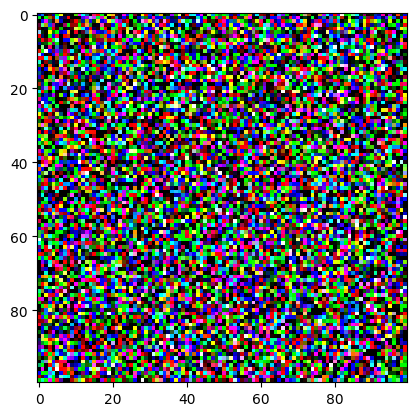

In [41]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras import backend as K

# Define the target class index
target_class_index = 9  # from which class 0-9

# Define the input image placeholder
input_image = tf.Variable(tf.random.normal((1, 100, 100, 3)))

# Define the loss function to maximize the target class activation
@tf.function
def loss_function():
    output = model(input_image)
    target_output = output[:, target_class_index]
    return -target_output

# Set up the optimizer
optimizer = tf.keras.optimizers.Adam()

# Optimization loop
epochs = 2000
for epoch in range(epochs):
    with tf.GradientTape() as tape:
        loss = loss_function()
    gradients = tape.gradient(loss, input_image)
    optimizer.apply_gradients([(gradients, input_image)])
    
    # Clip pixel values to [0, 1] to keep the image visually plausible
    input_image.assign(tf.clip_by_value(input_image, 0, 1))

    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss.numpy()}')

# Convert the generated image to numpy array
generated_image = input_image.numpy().squeeze()

# Display or save the generated image
plt.imshow(generated_image)


### What if it was trained more:

Epoch 0, Loss: [-0.00016267]
Epoch 100, Loss: [-0.00046883]
Epoch 200, Loss: [-0.00461407]
Epoch 300, Loss: [-0.6107472]
Epoch 400, Loss: [-0.9723237]
Epoch 500, Loss: [-0.98764104]
Epoch 600, Loss: [-0.99137795]
Epoch 700, Loss: [-0.99328494]
Epoch 800, Loss: [-0.99447745]
Epoch 900, Loss: [-0.9953288]
Epoch 1000, Loss: [-0.99594635]
Epoch 1100, Loss: [-0.9964224]
Epoch 1200, Loss: [-0.9968117]
Epoch 1300, Loss: [-0.99713874]
Epoch 1400, Loss: [-0.9974139]
Epoch 1500, Loss: [-0.9976484]
Epoch 1600, Loss: [-0.9978549]
Epoch 1700, Loss: [-0.9980355]
Epoch 1800, Loss: [-0.99820554]
Epoch 1900, Loss: [-0.9983553]


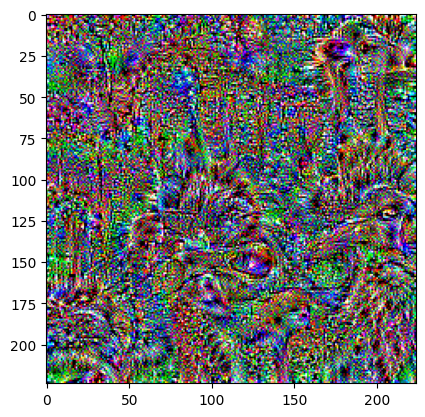

In [42]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras import backend as K

#  we can Load a pre-trained model
model = VGG16(weights='imagenet', include_top=True)

# Define the target class index
target_class_index = 9  # from which class 0-9

# Define the input image placeholder
input_image = tf.Variable(tf.random.normal((1, 224, 224, 3)))

# Define the loss function to maximize the target class activation
@tf.function
def loss_function():
    output = model(input_image)
    target_output = output[:, target_class_index]
    return -target_output

# Set up the optimizer
optimizer = tf.keras.optimizers.Adam()

# Optimization loop
epochs = 2000
for epoch in range(epochs):
    with tf.GradientTape() as tape:
        loss = loss_function()
    gradients = tape.gradient(loss, input_image)
    optimizer.apply_gradients([(gradients, input_image)])
    
    # Clip pixel values to [0, 1] to keep the image visually plausible
    input_image.assign(tf.clip_by_value(input_image, 0, 1))

    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss.numpy()}')

# Convert the generated image to numpy array
generated_image = input_image.numpy().squeeze()

# Display or save the generated image
plt.imshow(generated_image)


Epoch 0, Loss: [-0.00143656]
Epoch 100, Loss: [-0.23804441]
Epoch 200, Loss: [-0.9000098]
Epoch 300, Loss: [-0.95544493]
Epoch 400, Loss: [-0.9717884]
Epoch 500, Loss: [-0.97913456]
Epoch 600, Loss: [-0.98349506]
Epoch 700, Loss: [-0.9863664]
Epoch 800, Loss: [-0.9883989]
Epoch 900, Loss: [-0.98990005]
Epoch 1000, Loss: [-0.99105597]
Epoch 1100, Loss: [-0.99198407]
Epoch 1200, Loss: [-0.9927665]
Epoch 1300, Loss: [-0.993437]
Epoch 1400, Loss: [-0.99400514]
Epoch 1500, Loss: [-0.99448]
Epoch 1600, Loss: [-0.99487996]
Epoch 1700, Loss: [-0.995229]
Epoch 1800, Loss: [-0.9955466]
Epoch 1900, Loss: [-0.9958411]


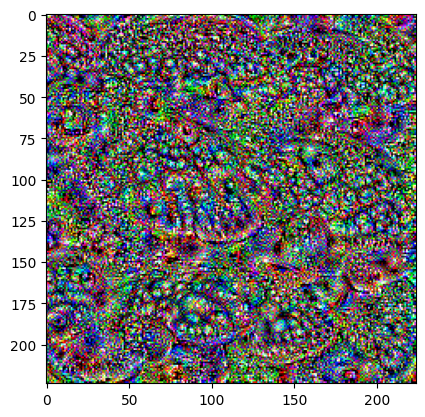

In [47]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras import backend as K


model = VGG16(weights='imagenet', include_top=True)
# Define the target class index
target_class_index = 5  # from which class 0-9

# Define the input image placeholder
input_image = tf.Variable(tf.random.normal((1, 224, 224, 3)))

# Define the loss function to maximize the target class activation
@tf.function
def loss_function():
    output = model(input_image)
    target_output = output[:, target_class_index]
    return -target_output

# Set up the optimizer
optimizer = tf.keras.optimizers.Adam()

# Optimization loop
epochs = 2000
for epoch in range(epochs):
    with tf.GradientTape() as tape:
        loss = loss_function()
    gradients = tape.gradient(loss, input_image)
    optimizer.apply_gradients([(gradients, input_image)])
    
    # Clip pixel values to [0, 1] to keep the image visually plausible
    input_image.assign(tf.clip_by_value(input_image, 0, 1))

    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss.numpy()}')

# Convert the generated image to numpy array
generated_image = input_image.numpy().squeeze()

# Display or save the generated image
plt.imshow(generated_image)


# Trying other Architectures

## Xception

In [50]:
from tensorflow.keras import layers, models

def xception_model(input_shape, num_classes):
    inputs = layers.Input(shape=input_shape)
    
    # Entry flow
    x = layers.Conv2D(32, (3, 3), strides=(2, 2), use_bias=False)(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    
    x = layers.Conv2D(64, (3, 3), use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    
    residual = layers.Conv2D(128, (1, 1), strides=(2, 2), padding='same', use_bias=False)(x)
    residual = layers.BatchNormalization()(residual)
    
    x = layers.SeparableConv2D(128, (3, 3), padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    
    x = layers.SeparableConv2D(128, (3, 3), padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    
    x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
    x = layers.add([x, residual])
    
    # Middle flow (repeat this block multiple times)
    for _ in range(8):
        residual = x
        
        x = layers.Activation('relu')(x)
        x = layers.SeparableConv2D(128, (3, 3), padding='same', use_bias=False)(x)
        x = layers.BatchNormalization()(x)
        
        x = layers.Activation('relu')(x)
        x = layers.SeparableConv2D(128, (3, 3), padding='same', use_bias=False)(x)
        x = layers.BatchNormalization()(x)
        
        x = layers.Activation('relu')(x)
        x = layers.SeparableConv2D(128, (3, 3), padding='same', use_bias=False)(x)
        x = layers.BatchNormalization()(x)
        
        x = layers.add([x, residual])
    
    # Exit flow
    residual = layers.Conv2D(256, (1, 1), strides=(2, 2), padding='same', use_bias=False)(x)
    residual = layers.BatchNormalization()(residual)
    
    x = layers.Activation('relu')(x)
    x = layers.SeparableConv2D(256, (3, 3), padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    
    x = layers.Activation('relu')(x)
    x = layers.SeparableConv2D(256, (3, 3), padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    
    x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
    x = layers.add([x, residual])
    
    x = layers.SeparableConv2D(512, (3, 3), padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    
    x = layers.GlobalAveragePooling2D()(x)
    
    x = layers.Dense(64, activation='relu')(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    
    model = models.Model(inputs, outputs)
    return model

# Create the Xception-like model
model = xception_model(input_shape=(100, 100, 3), num_classes=10)



In [49]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=50, 
                    validation_data=(test_images, test_labels))

Epoch 1/50
317/317 ━━━━━━━━━━━━━━━━━━━━ 71s 118ms/step - accuracy: 0.4736 - loss: 1.4680 - val_accuracy: 0.1054 - val_loss: 2.5451
Epoch 2/50
317/317 ━━━━━━━━━━━━━━━━━━━━ 19s 59ms/step - accuracy: 0.7099 - loss: 0.8362 - val_accuracy: 0.5221 - val_loss: 1.5296
Epoch 3/50
317/317 ━━━━━━━━━━━━━━━━━━━━ 19s 59ms/step - accuracy: 0.7811 - loss: 0.6396 - val_accuracy: 0.7051 - val_loss: 0.9799
Epoch 4/50
317/317 ━━━━━━━━━━━━━━━━━━━━ 19s 59ms/step - accuracy: 0.8317 - loss: 0.4903 - val_accuracy: 0.6097 - val_loss: 1.4483
Epoch 5/50
317/317 ━━━━━━━━━━━━━━━━━━━━ 19s 59ms/step - accuracy: 0.8636 - loss: 0.4060 - val_accuracy: 0.5292 - val_loss: 2.5228
Epoch 6/50
317/317 ━━━━━━━━━━━━━━━━━━━━ 19s 59ms/step - accuracy: 0.8821 - loss: 0.3528 - val_accuracy: 0.7486 - val_loss: 0.9169
Epoch 7/50
317/317 ━━━━━━━━━━━━━━━━━━━━ 19s 59ms/step - accuracy: 0.9089 - loss: 0.2744 - val_accuracy: 0.6774 - val_loss: 1.3085
Epoch 8/50
317/317 ━━━━━━━━━━━━━━━━━━━━ 19s 59ms/step - accuracy: 0.9237 - loss: 0.2238 -

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



317/317 ━━━━━━━━━━━━━━━━━━━━ 19s 60ms/step - accuracy: 0.9926 - loss: 0.0247 - val_accuracy: 0.7849 - val_loss: 1.0704
Epoch 46/50
317/317 ━━━━━━━━━━━━━━━━━━━━ 19s 60ms/step - accuracy: 0.9900 - loss: 0.0341 - val_accuracy: 0.8497 - val_loss: 0.7937
Epoch 47/50
317/317 ━━━━━━━━━━━━━━━━━━━━ 19s 60ms/step - accuracy: 0.9881 - loss: 0.0383 - val_accuracy: 0.7742 - val_loss: 1.4342
Epoch 48/50
317/317 ━━━━━━━━━━━━━━━━━━━━ 19s 60ms/step - accuracy: 0.9852 - loss: 0.0467 - val_accuracy: 0.7799 - val_loss: 1.1795
Epoch 49/50
317/317 ━━━━━━━━━━━━━━━━━━━━ 19s 59ms/step - accuracy: 0.9833 - loss: 0.0487 - val_accuracy: 0.7849 - val_loss: 1.1454
Epoch 50/50
317/317 ━━━━━━━━━━━━━━━━━━━━ 19s 59ms/step - accuracy: 0.9925 - loss: 0.0251 - val_accuracy: 0.7678 - val_loss: 1.2747


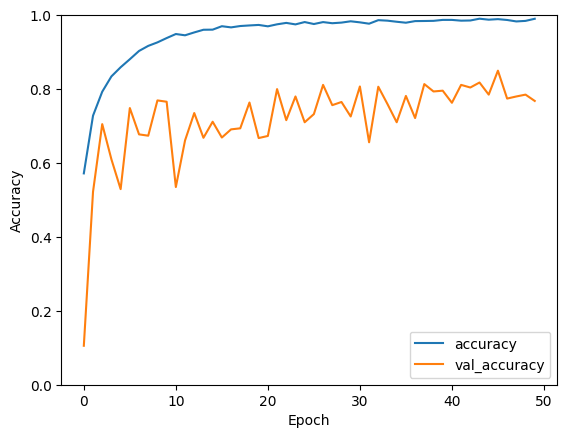

In [52]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')


## VGG

In [66]:
from tensorflow.keras import layers, models

def robust_cnn_model(input_shape, num_classes):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.BatchNormalization(),
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),
        
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),
        
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),
        
        layers.Conv2D(256, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.Conv2D(256, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),
        
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    
    return model


input_shape = (100, 100, 3)
num_classes = 10

# Create the model
model = robust_cnn_model(input_shape, num_classes)


In [67]:

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=100, 
                    validation_data=(test_images, test_labels))

Epoch 1/100
317/317 ━━━━━━━━━━━━━━━━━━━━ 36s 61ms/step - accuracy: 0.3411 - loss: 2.3503 - val_accuracy: 0.1588 - val_loss: 4.5969
Epoch 2/100
317/317 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.5453 - loss: 1.4150 - val_accuracy: 0.5905 - val_loss: 1.2889
Epoch 3/100
317/317 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.6142 - loss: 1.1572 - val_accuracy: 0.5442 - val_loss: 1.5642
Epoch 4/100
317/317 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.6695 - loss: 0.9748 - val_accuracy: 0.6403 - val_loss: 1.1084
Epoch 5/100
317/317 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.7025 - loss: 0.8688 - val_accuracy: 0.6923 - val_loss: 0.9084
Epoch 6/100
317/317 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.7390 - loss: 0.7607 - val_accuracy: 0.6702 - val_loss: 1.0623
Epoch 7/100
317/317 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.7757 - loss: 0.6800 - val_accuracy: 0.6802 - val_loss: 1.0441
Epoch 8/100
317/317 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.7897 - loss: 0.6153 -

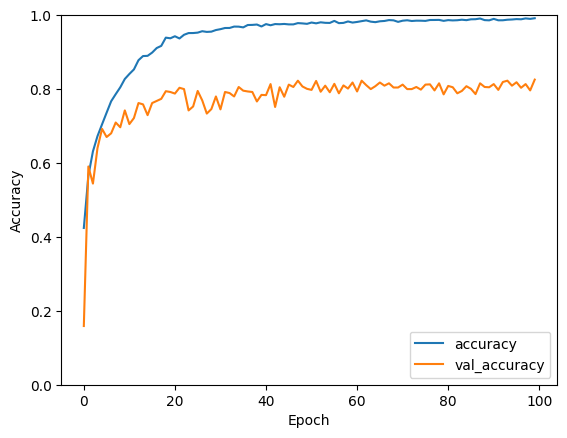

In [68]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')


In [70]:
test_predictions = model.predict(test_images)
test_predictions = np.argmax(test_predictions, axis=1)

44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step


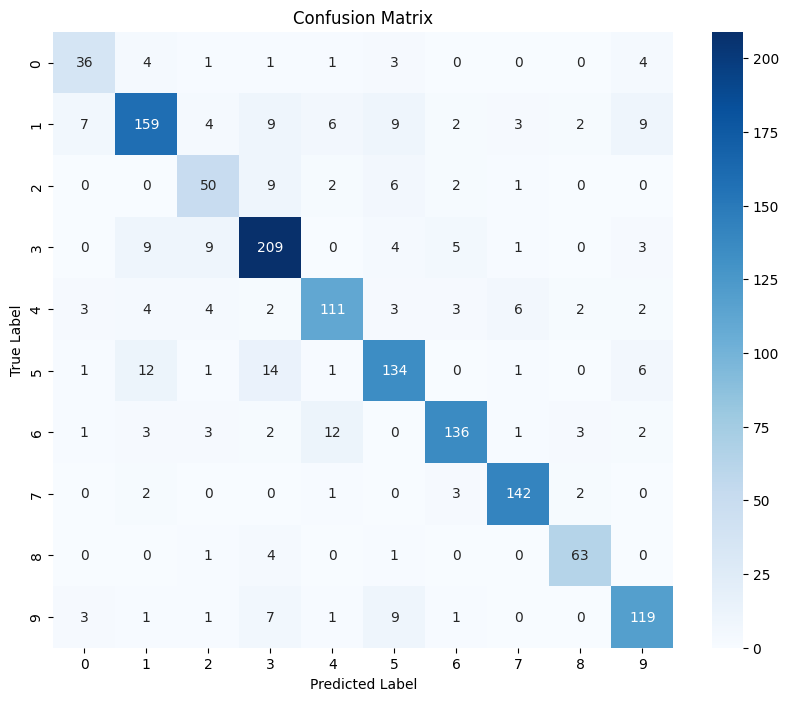

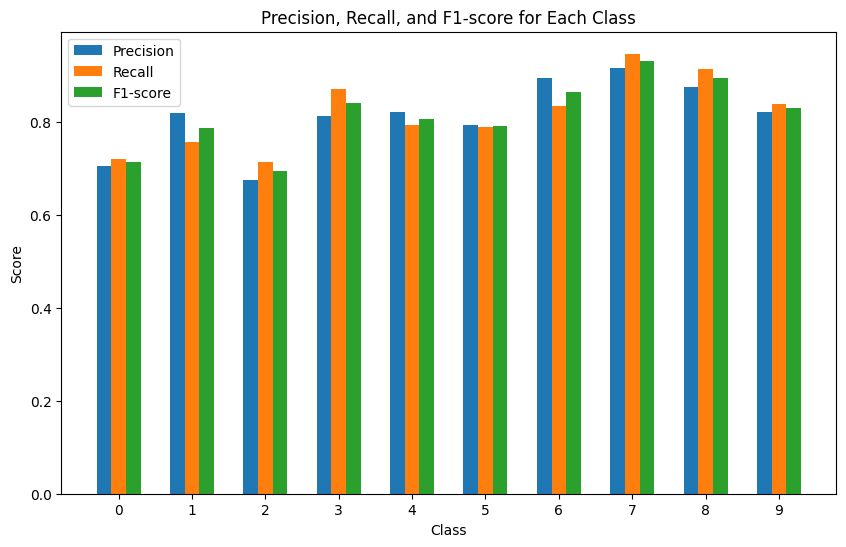

        Class  Precision    Recall  F1 Score
0           0   0.705882  0.720000  0.712871
1           1   0.819588  0.757143  0.787129
2           2   0.675676  0.714286  0.694444
3           3   0.813230  0.870833  0.841046
4           4   0.822222  0.792857  0.807273
5           5   0.792899  0.788235  0.790560
6           6   0.894737  0.834356  0.863492
7           7   0.916129  0.946667  0.931148
8           8   0.875000  0.913043  0.893617
9           9   0.820690  0.838028  0.829268
Overall     -   0.826181  0.825499  0.825252


In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support


conf_matrix = confusion_matrix(test_labels, test_predictions)
precision, recall, f1, _ = precision_recall_fscore_support(test_labels, test_predictions, average=None)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=True, yticklabels=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

classes = np.arange(10) 
plt.figure(figsize=(10, 6))
plt.bar(classes - 0.2, precision, width=0.2, label='Precision')
plt.bar(classes, recall, width=0.2, label='Recall')
plt.bar(classes + 0.2, f1, width=0.2, label='F1-score')
plt.xlabel('Class')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1-score for Each Class')
plt.xticks(classes)
plt.legend()
plt.show()


accuracy = accuracy_score(test_labels, test_predictions)
precision, recall, f1, _ = precision_recall_fscore_support(test_labels, test_predictions, average=None)
overall_precision, overall_recall, overall_f1, _ = precision_recall_fscore_support(test_labels, test_predictions, average='weighted')

metrics_df = pd.DataFrame({
    'Class': np.arange(10), 
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
})

metrics_df.loc['Overall'] = ['-', overall_precision, overall_recall, overall_f1]

print(metrics_df)
